In [133]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

from sklearn.cluster import DBSCAN, KMeans

import seaborn as sns
sns.set()

from PIL import Image

import numpy as np
from numpy import mean
from numpy import isnan
from numpy import asarray

import os
import shutil, glob, os.path

from random import shuffle

from tqdm import tqdm

import math

import skimage
from skimage import data, io, color
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu 
from skimage.feature import canny 

from time import time

from random import randint

from scipy import stats


Using Gray Scale Segmentation .............
files in directory:  ./faces 
 ['branca01.jpg', 'branca02.jpg', 'branca03.jpg', 'casal_branco01.jpg', 'casal_moreno01.jpg', 'familia_branca01.jpg', 'familia_morena01.jpg', 'homem_branco01.jpg', 'homem_branco02.jpg', 'homem_branco03.jpg', 'homem_branco04.jpg', 'homem_moreno01.jpg', 'homem_moreno02.jpg', 'homem_moreno03.jpg', 'homem_moreno04.jpg', 'image_teste_segementacao_3_classes.png', 'jovem_branco01.jpg', 'jovem_branco02.jpg', 'jovem_branco03.jpg', 'jovem_branco04.jpg', 'jovem_loura01.jpg', 'jovem_moreno01.jpg', 'jovem_moreno02.jpg', 'jovem_moreno03.jpg', 'jovem_moreno04.jpg', 'morena01.jpg', 'morena02.jpg', 'morena03.jpg', 'mulher_morena01.jpg', 'mulher_morena02.jpg', 'mulher_morena03.jpg', 'senhora_branca01.jpg', 'senhora_branca02.jpg', 'senhora_branca03.jpg', 'senhora_branca04.jpg', 'senhora_morena01.jpg', 'senhora_morena02.jpg', 'senhora_morena03.jpg', 'senhora_morena04.jpg', 'senhor_branco01.jpg', 'senhor_branco02.jpg', 'senhor_branco

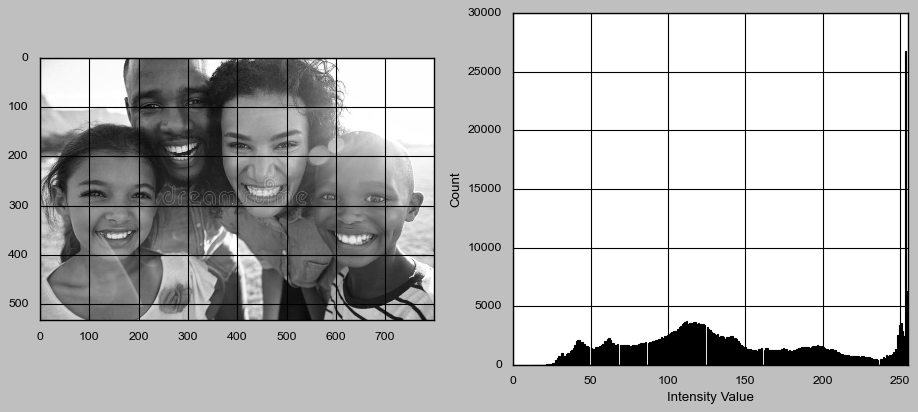


Imagem # 2 : homem_branco01.jpg
resolução da imagem:  (532, 426, 3)


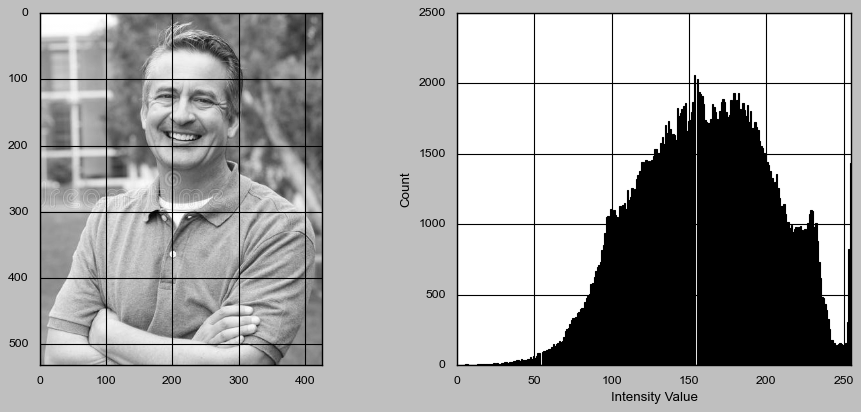


Imagem # 3 : homem_branco02.jpg
resolução da imagem:  (504, 652, 3)


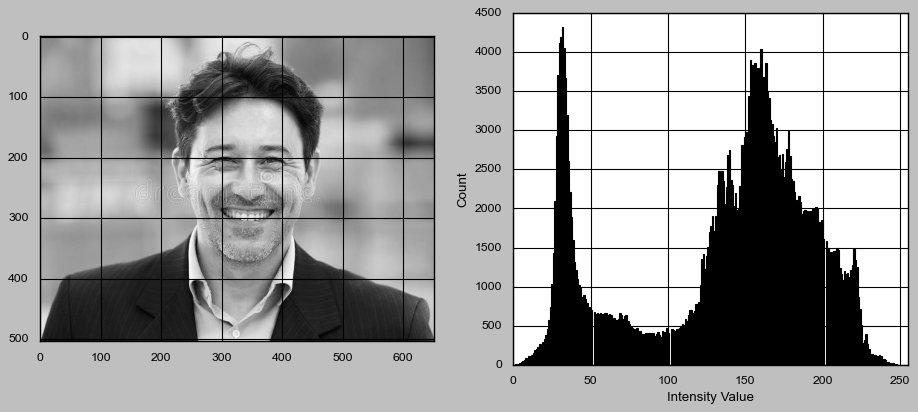


Imagem # 4 : homem_branco03.jpg
resolução da imagem:  (525, 602, 3)


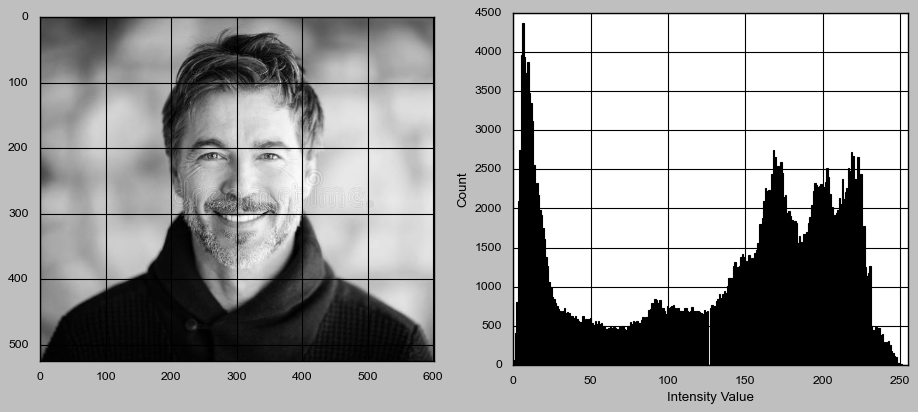


Imagem # 5 : homem_branco04.jpg
resolução da imagem:  (558, 404, 3)


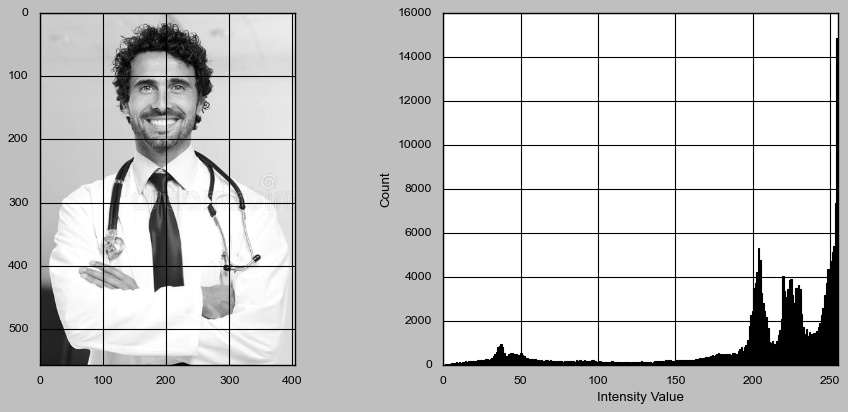


Imagem # 6 : homem_moreno01.jpg
resolução da imagem:  (534, 585, 3)


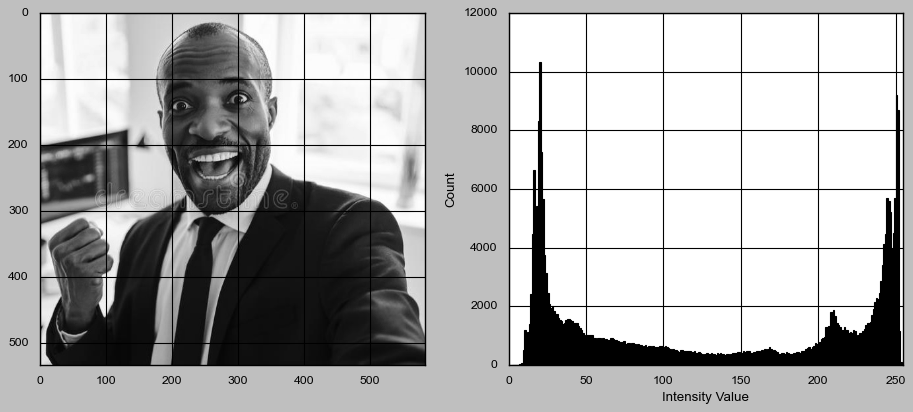

In [120]:
# PREPROCESSAMENTO DAS IMAGENS

as_gray = True #True  #False #True para trabalhar com imagens em escala de cinza

if as_gray:
    print("Using Gray Scale Segmentation .............")

#contagem e verificação das imagens
    
INPUT_PATH = './faces'


Files=os.listdir(INPUT_PATH)
print("files in directory: ",INPUT_PATH,"\n",os.listdir(INPUT_PATH))

Img=[]
img=[]
ncolors=[]
ResX=[]
ResY=[]
n=[]

nImg = 6
ini_img = 6
fim_img = 12
print("\nSelecionadas as imgs de", ini_img, "até", fim_img)
ctr = 1
for filename in Files[ini_img:fim_img]:
    
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'): # filtro formato da imagem
        try:
            img.append(io.imread(INPUT_PATH+"/"+filename))#, as_gray=as_gray)) # open the image file
            print("\nImagem #",ctr,':',filename)
            ctr+=1
            print("resolução da imagem: ",img[-1].shape)
            Img.append(img) # backup of original images
            
            ncolors.append(img[-1].shape[-1])
            ResX.append(img[-1].shape[0])
            ResY.append(img[-1].shape[1])
            n.append(ResX[-1]*ResY[-1])
            if not as_gray: 
                fig2, ax2 = plt.subplots(1,3, figsize=(20, 5.5))
                ax2[0].imshow(img[-1])
                if ncolors[-1]>1:
                    ax2[1].hist(img[-1].ravel(), bins = 64, color = 'orange', alpha = 0.5)
                    ax2[1].legend(['Total'])
                    ax2[2].hist(img[-1][:, :, 0].ravel(), bins = 64, color = 'Red', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 1].ravel(), bins = 64, color = 'Green', alpha = 0.5)
                    ax2[2].hist(img[-1][:, :, 2].ravel(), bins = 64, color = 'Blue', alpha = 0.5)
                    ax2[2].legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
                    ax2[1].set_xlim(0, 255)
                    ax2[1].set_xlabel('Intensity Value')
                    ax2[1].set_ylabel('Count')
                    ax2[2].set_xlim(0, 255)
                    ax2[2].set_xlabel('Intensity Value')
                    ax2[2].set_ylabel('Count')
                plt.show()
            else: # to work with gray images
                plt.style.use('grayscale')
                if ncolors[-1]>1: # if it is RGB convert to grayscale
                    img[-1]=np.round(255*rgb2gray(img[-1]))
                ncolors[-1]=1
                fig2, ax2 = plt.subplots(1,2, figsize=(14, 5.5))
                ax2[0].imshow(img[-1])
                ax2[1].hist(img[-1].ravel(), bins = 256)   
                ax2[1].set_xlim(0, 255)
                ax2[1].set_xlabel('Intensity Value')
                ax2[1].set_ylabel('Count')
                plt.show()
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)


In [121]:
# transforma imagens em vetores

Images=[]

for my_img in range(nImg):

    image=img[my_img]

    ch=[] # color channel vectors 

    for c in range(ncolors[my_img]):
        if ncolors[my_img]>1:
            ch.append(image[:,:,c].flatten()) 
        else:
            ch.append(image.flatten())
    print(ch)
    Images.append(np.array(ch))

[array([220., 220., 220., ..., 171., 178., 182.])]
[array([255., 255., 255., ..., 136., 138., 138.])]
[array([142., 142., 141., ...,  81.,  85., 110.])]
[array([ 67.,  67.,  68., ...,  79.,  89., 100.])]
[array([204., 204., 204., ..., 219., 219., 219.])]
[array([253., 253., 252., ...,  41.,  40.,  38.])]


In [122]:
# geração de cores para representar cada cluster

my_color = []
my_color.append('#%06X' % 0)
my_color.append('#%06X' % 0xFFFFFF)
for i in range(20):
    my_color.append('#%06X' % randint(0, 0xFFFFFF))

In [123]:
#K-means

def kmeans(image, K, ncolors, n, maxiter):
    tempo_inicio = time()

    cc = np.zeros((ncolors,K), dtype=int) # vetor (matriz) de centroides

    classe = [-1 for i in range(n)] # inicializa o vetor de classificação de cada n da img. Todos com -1 inicialmente

    # inicialização não-randomica dos centroides
    min_cinza = min(np.array(image).ravel())
    max_cinza = max(np.array(image).ravel())
    S = (max_cinza - min_cinza) / K
    bg = [0]*K
    ed = [0]*K
    for k in range(K):
        if k == 0:
            bg[k] = min_cinza
            ed[k] = min_cinza + S
        else:
            bg[k] = ed[k-1] + 1
            ed[k] = ed[k-1] + S
        for c in range(ncolors):
            cc[c,k] = int( (ed[k] + bg[k]) / 2 )

    INIT_TIME = time() - tempo_inicio

    tempo_inicio = time()

    #Processo iterativo
    iteracoes = 0
    while True:
        iteracoes += 1

        if iteracoes > maxiter:
            print("O número máximo de iterações (", maxiter,") foi excedido!")
            break

        mudanca = 0

        for i in range(n):    # varrendo os pixels
            d_minima = 1e30
            k_mais_prox = -1

            for k in range(K):   # varrendo clusters
                d = 0

                for c in range(ncolors):
                    d += np.abs(image[c][i] - cc[c][k])

                if d < d_minima:
                    d_minima = d
                    k_mais_prox = k

            if classe[i] != k_mais_prox:
                classe[i] = k_mais_prox # define a qual cluster aquele pixel pertence
                mudanca += 1

        if mudanca == 0:
            ITER_TIME = time() - tempo_inicio
            break
        else:   # calculando novos centroides
            cluster_sz = [0 for k in range(K)]
            for i in range(n):
                for c in range(ncolors):
                    cc[c][classe[i]] += image[c][i]
                    cluster_sz[classe[i]] += 1

            for k in range(K):
                if cluster_sz[k]>0:
                    for c in range(ncolors):
                        cc[c][k] = int(cc[c][k]/cluster_sz[k])
                else: # caso um cluster fique sem nenhum ponto
                    print("Cluster", k,"sem pontos... Reinicializando o algortimo")
                    iteracoes = 0
                    for k in range(K):
                        p = randint(0,n-1) # pega um ponto qualquer
                        for c in range(ncolors):
                            cc[c,k] = image[c,p]

    return ITER_TIME, iteracoes, classe, cc

In [124]:
class Image_per_cluster:
    def __init__(self, n, k, t, var, iterations):
        self.n = n
        self.k = k
        self.t = t
        self.var = var
        self.iterations = iterations

    def __repr__(self):
        return str(self)



IMAGEM NÚMERO 1 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
426400 2 8.1420147895813 ( 0.028660004382551188 ) 0.0035200137955073672 7.0 ( 0.0 )
Cluster 0 limites 12.0 : 156.0
Cluster 1 limites 157.0 : 255.0


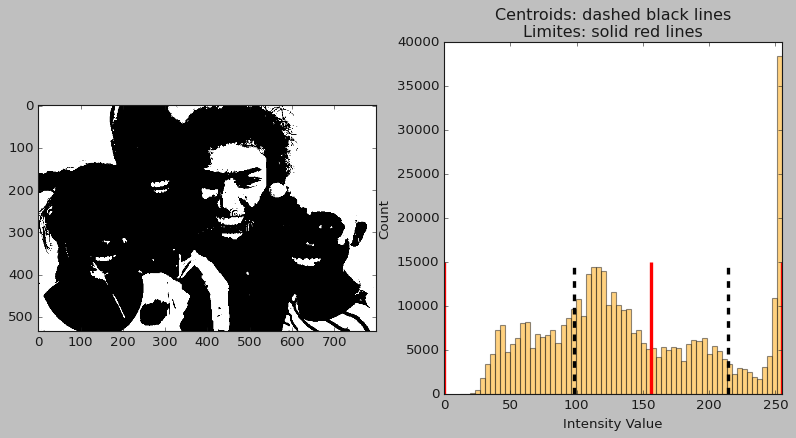

426400 3 8.017403268814087 ( 0.017577641842998804 ) 0.0021924357867056424 5.0 ( 0.0 )
Cluster 0 limites 12.0 : 97.0
Cluster 1 limites 98.0 : 176.0
Cluster 2 limites 177.0 : 255.0


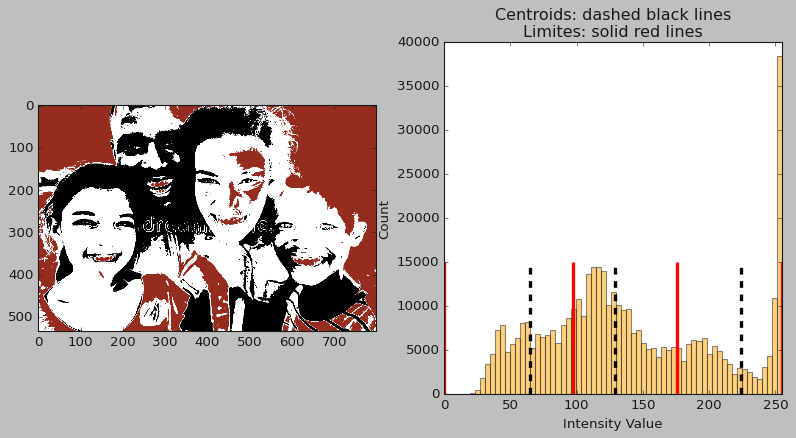

426400 4 27.05421190261841 ( 0.09305453396777147 ) 0.0034395581103127716 13.0 ( 0.0 )
Cluster 0 limites 12.0 : 88.0
Cluster 1 limites 89.0 : 148.0
Cluster 2 limites 149.0 : 212.0
Cluster 3 limites 213.0 : 255.0


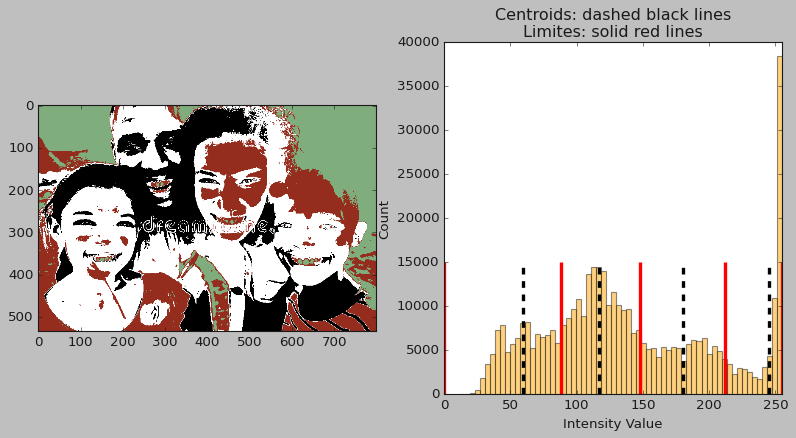



IMAGEM NÚMERO 2 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
226632 2 5.574514555931091 ( 0.012900286258427755 ) 0.0023141541974632204 9.0 ( 0.0 )
Cluster 0 limites 4.0 : 158.0
Cluster 1 limites 159.0 : 255.0


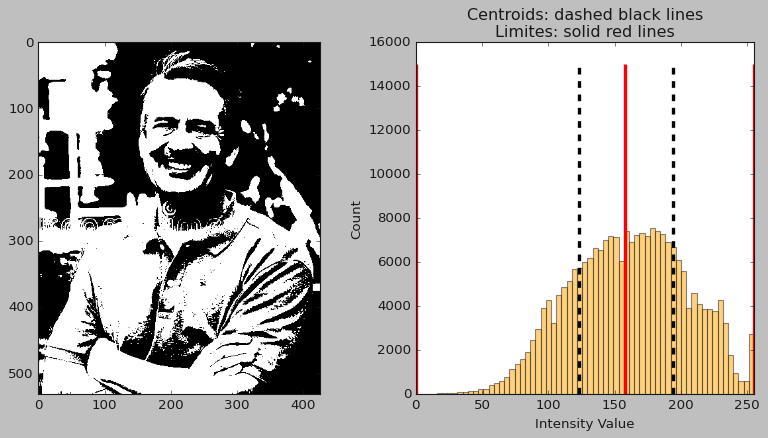

226632 3 12.167266011238098 ( 0.11613615625714611 ) 0.009544967304066405 14.0 ( 0.0 )
Cluster 0 limites 4.0 : 131.0
Cluster 1 limites 132.0 : 182.0
Cluster 2 limites 183.0 : 255.0


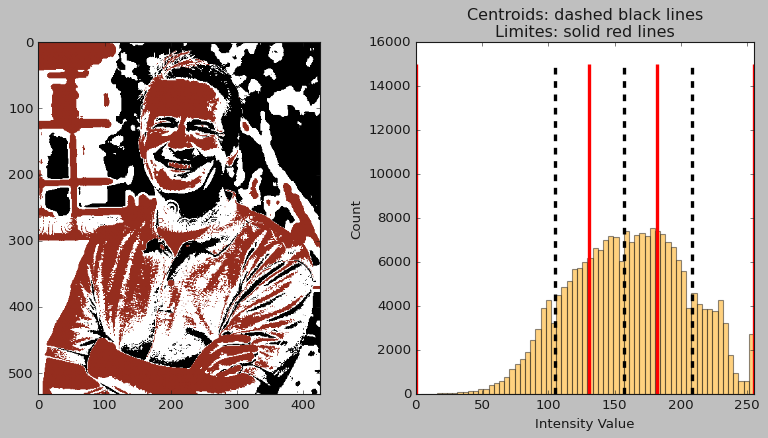

226632 4 20.120385432243346 ( 0.24511293742495893 ) 0.012182318189201298 18.0 ( 0.0 )
Cluster 0 limites 4.0 : 113.0
Cluster 1 limites 114.0 : 153.0
Cluster 2 limites 154.0 : 194.0
Cluster 3 limites 195.0 : 255.0


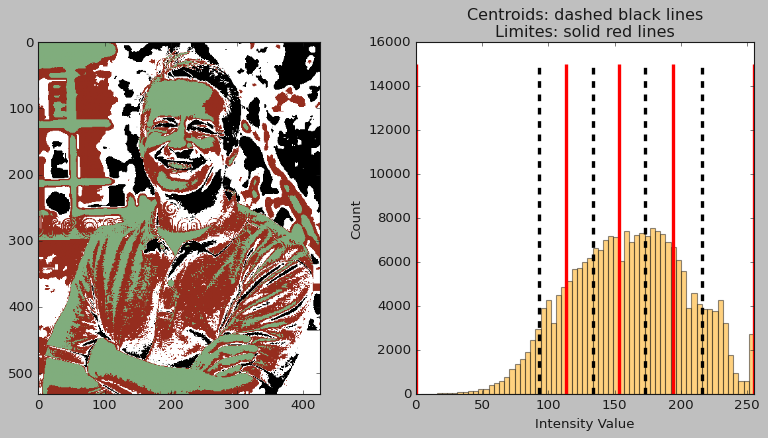



IMAGEM NÚMERO 3 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
328608 2 5.300395536422729 ( 0.014147835542538404 ) 0.0026692037311779318 6.0 ( 0.0 )
Cluster 0 limites 1.0 : 106.0
Cluster 1 limites 107.0 : 252.0


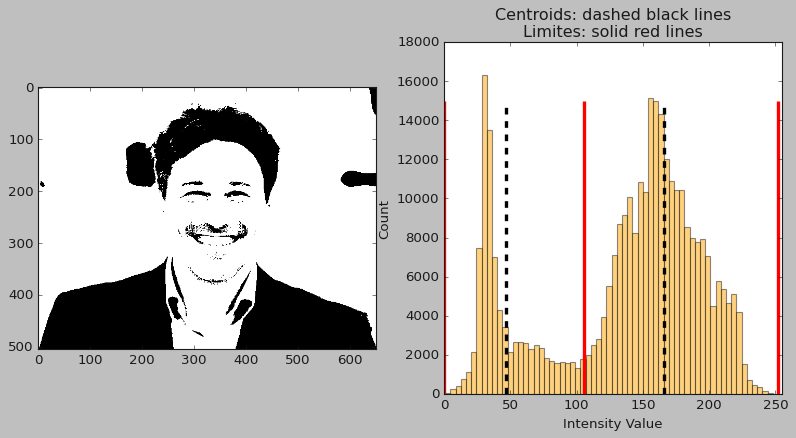

328608 3 4.939699912071228 ( 0.013957002580964554 ) 0.0028254758040782172 4.0 ( 0.0 )
Cluster 0 limites 1.0 : 93.0
Cluster 1 limites 94.0 : 167.0
Cluster 2 limites 168.0 : 252.0


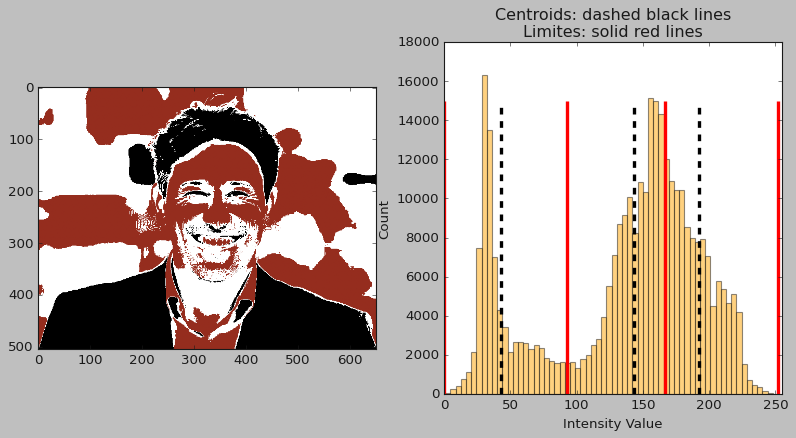

328608 4 19.278531193733215 ( 0.03136908867064124 ) 0.0016271513817836003 12.0 ( 0.0 )
Cluster 0 limites 1.0 : 79.0
Cluster 1 limites 80.0 : 138.0
Cluster 2 limites 139.0 : 178.0
Cluster 3 limites 179.0 : 252.0


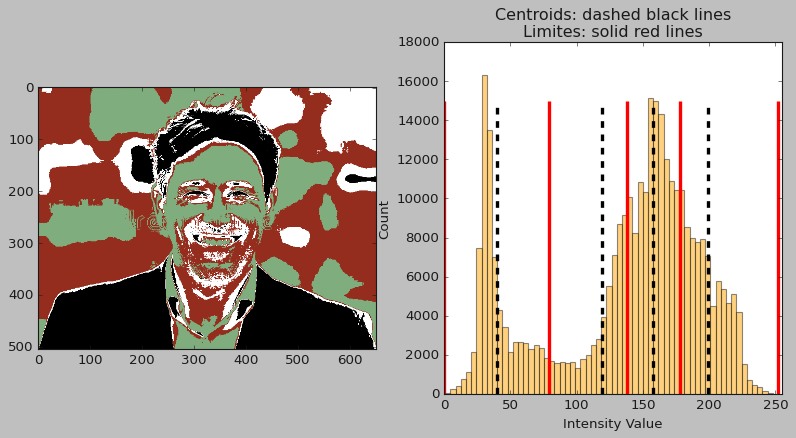



IMAGEM NÚMERO 4 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
316050 2 5.109730553627014 ( 0.018568240891332737 ) 0.0036338982450165665 6.0 ( 0.0 )
Cluster 0 limites 0.0 : 110.0
Cluster 1 limites 111.0 : 254.0


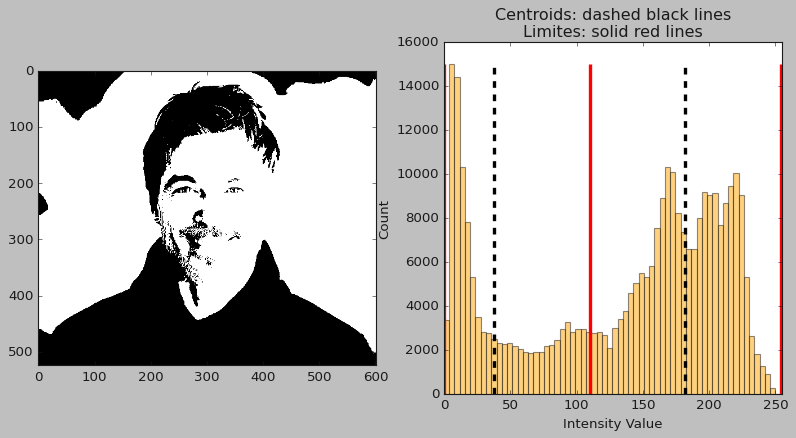

316050 3 10.824930906295776 ( 0.045585741152443925 ) 0.004211180796168525 9.0 ( 0.0 )
Cluster 0 limites 0.0 : 75.0
Cluster 1 limites 76.0 : 163.0
Cluster 2 limites 164.0 : 254.0


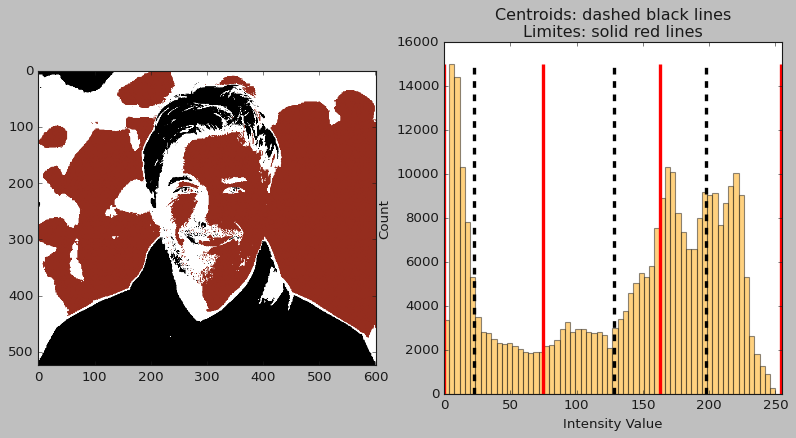

316050 4 7.545199537277222 ( 0.014931587467823844 ) 0.001978951967281185 5.0 ( 0.0 )
Cluster 0 limites 0.0 : 57.0
Cluster 1 limites 58.0 : 129.0
Cluster 2 limites 130.0 : 186.0
Cluster 3 limites 187.0 : 254.0


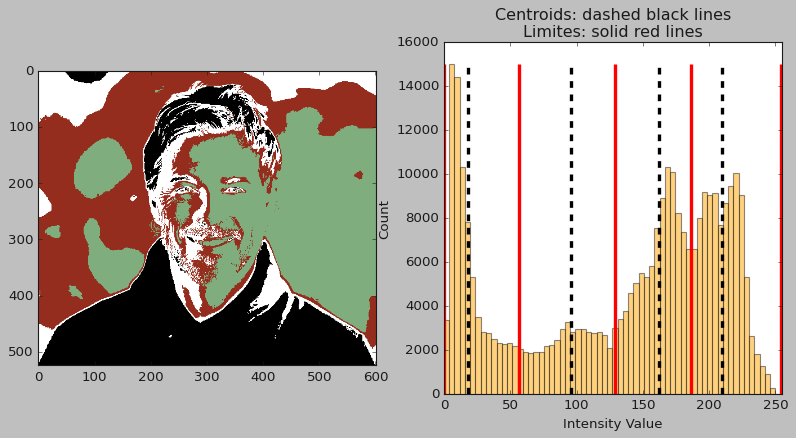



IMAGEM NÚMERO 5 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
225432 2 3.0104998111724854 ( 0.009489375511253942 ) 0.003152093043167526 5.0 ( 0.0 )
Cluster 0 limites 0.0 : 143.0
Cluster 1 limites 144.0 : 255.0


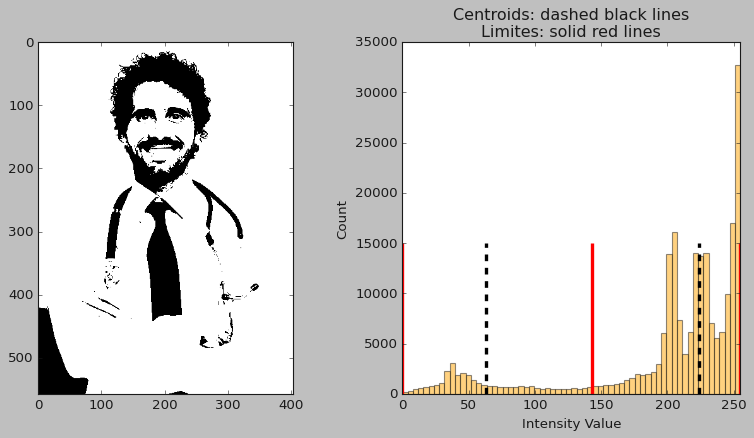

225432 3 14.797770380973816 ( 0.0458615436104035 ) 0.0030992198439144473 17.0 ( 0.0 )
Cluster 0 limites 0.0 : 125.0
Cluster 1 limites 126.0 : 216.0
Cluster 2 limites 217.0 : 255.0


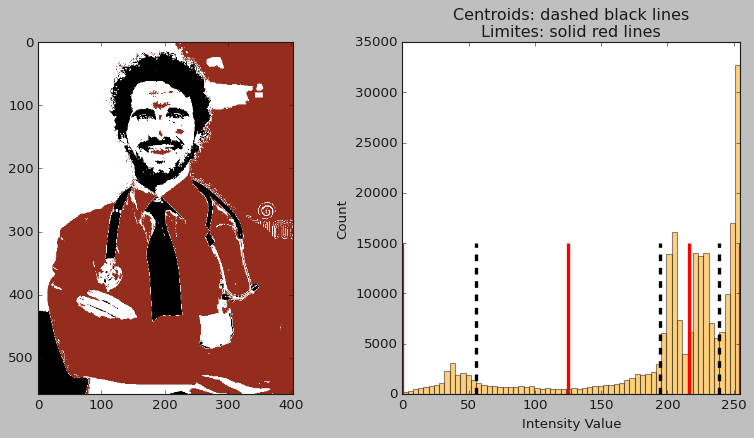

225432 4 14.298520946502686 ( 0.02897074880537318 ) 0.002026136053775493 13.0 ( 0.0 )
Cluster 0 limites 0.0 : 83.0
Cluster 1 limites 84.0 : 162.0
Cluster 2 limites 163.0 : 220.0
Cluster 3 limites 221.0 : 255.0


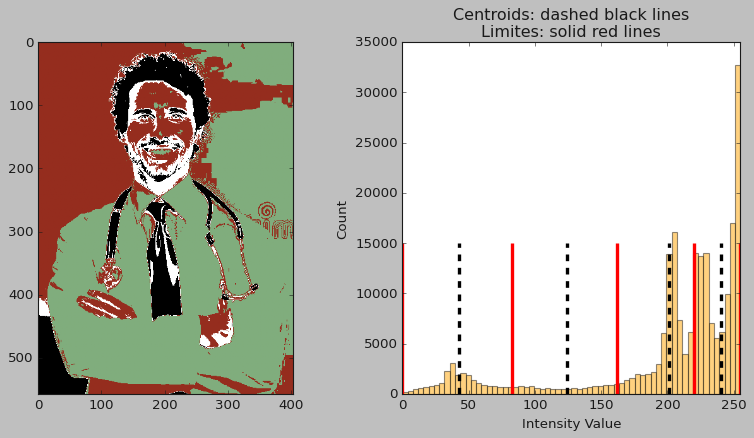



IMAGEM NÚMERO 6 :


n     K     itTime (Std)     Variabilidade     Iterations (Std)
312390 2 3.339220142364502 ( 0.024194297267235997 ) 0.007245493329500586 4.0 ( 0.0 )
Cluster 0 limites 2.0 : 133.0
Cluster 1 limites 134.0 : 255.0


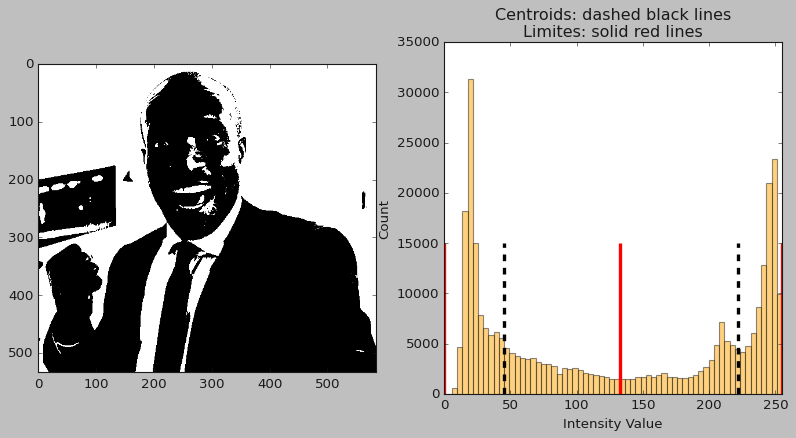

312390 3 7.08819944858551 ( 0.03027145385876224 ) 0.00427068313728151 6.0 ( 0.0 )
Cluster 0 limites 2.0 : 77.0
Cluster 1 limites 78.0 : 177.0
Cluster 2 limites 178.0 : 255.0


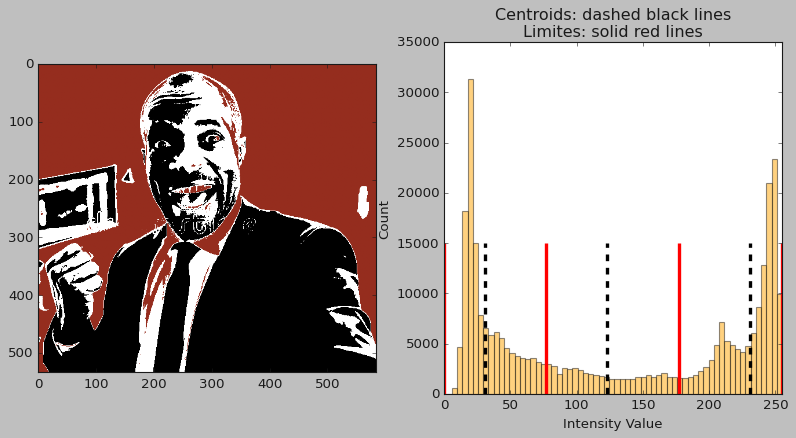

312390 4 7.5025145530700685 ( 0.012837293550633488 ) 0.001711065464762131 5.0 ( 0.0 )
Cluster 0 limites 2.0 : 56.0
Cluster 1 limites 57.0 : 125.0
Cluster 2 limites 126.0 : 200.0
Cluster 3 limites 201.0 : 255.0


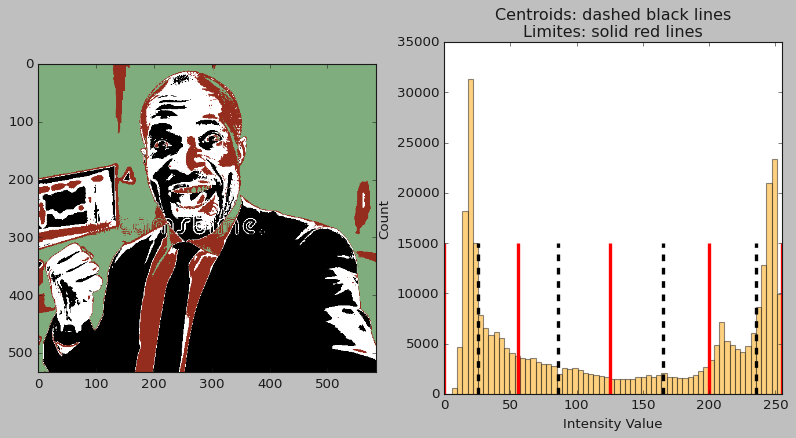

In [125]:
# Experimentos

plt.style.use('classic')

RODADAS_BENCHMARK = 10
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4

L = 256

lista_full = []

for i in range(nImg):

    stats_per_image = []

    print("\n\nIMAGEM NÚMERO", i+1,":\n\n")

    print("n     K     itTime (Std)     Variabilidade     Iterations (Std)")
    x = ResX[i]
    y = ResY[i]
    N = x*y

    for K in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):

        ItTime=[]
        Iter=[]

        for bench in range(RODADAS_BENCHMARK):
            IterTime, iterations, classe, centros = kmeans(Images[i], K, ncolors[i], N, 100)

            ItTime.append(IterTime)
            Iter.append(iterations)

        image_pk = Image_per_cluster(N, K, np.mean(ItTime), np.std(ItTime)/np.mean(ItTime), np.mean(Iter))
        print(N, K, image_pk.t, '(', np.std(ItTime), ')', image_pk.var, image_pk.iterations, '(', np.std(Iter), ')')

        stats_per_image.append(image_pk)

        # ordenando centroides das classes de menor para maior
        OrderOf = np.argsort(centros)[0]

        # calculando os limites das classes
        up = []
        dw = []
        for k in range(K):
            clsslst = np.argwhere(np.array(classe) == k)
            clsspxls = Images[i][0][clsslst]
            up.append(np.max(clsspxls))
            dw.append(np.min(clsspxls))
            print("Cluster", k, "limites", dw[-1], ":", up[-1])

        # gerando a mascara com K cores segundo a classificação dos pixels
        Mask = []
        for j in range(N):
            Mask.append(colors.hex2color(my_color[OrderOf[classe[j]]]))

        # PLOT

        fig, ax = plt.subplots(1,2, figsize=(12, 5.5))
        ax[0].imshow(np.array(Mask).reshape(x,y,-1))
        ax[1].hist(np.array(Images[i]).ravel(), bins = 64, color = 'orange', alpha = 0.5)
        ax[1].set_xlim(0, L-1)
        if ncolors[i]>1:
            C = []
            for k in range(K):
                C.append(int(0.2989*centros[0][k]+0.5870*centros[1][k]+0.1140*centros[2][k]))
        else:
            C = centros
        ax[1].vlines(C,0,15000,linestyles='dashed',linewidths=3,colors='black') # centroides
        ax[1].vlines([0]+up,0,15000,linestyles='solid',linewidths=3,colors='red') # limites
        ax[1].set_xlabel('Intensity Value')
        ax[1].set_ylabel('Count')
        ax[1].set_title('Centroids: dashed black lines\nLimites: solid red lines')

        plt.show()

    lista_full.append(stats_per_image)

In [149]:
# Calcular a regressão linear
def show_linear_time(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'time = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('time')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

def show_linear_iter(n,t):
    slope, intercept, r_value, p_value, std_err = stats.linregress(n, t)
    line = slope * np.array(n) + intercept
    
    # Calcular R^2 (coeficiente de determinação) e o coeficiente de correlação de Pearson
    r_squared = r_value ** 2
    pearson_coeficiente = r_value
    
    # Plotar os pontos e a linha de regressão linear
    plt.scatter(n, t, label='Pontos')
    plt.plot(n, line, color='red', label='Regressão Linear')
    
    # Adicionar título com R^2 e o coeficiente de correlação de Pearson
    titulo = f'Regressão Linear (R²={r_squared:.2f}, Pearson={pearson_coeficiente:.2f})'
    plt.title(titulo)
    # Adicionar legenda para a equação da linha
    plt.text(0.07, 0.8, f'iterations = {slope:.2g}n + {intercept:.2g}', fontsize=12, transform=plt.gca().transAxes)
    
    # Adicionar legendas
    plt.xlabel('problem size (n)')
    plt.ylabel('iterations')
    plt.legend()
    
    # Exibir o gráfico
    plt.show()

# 2 CLUSTERS

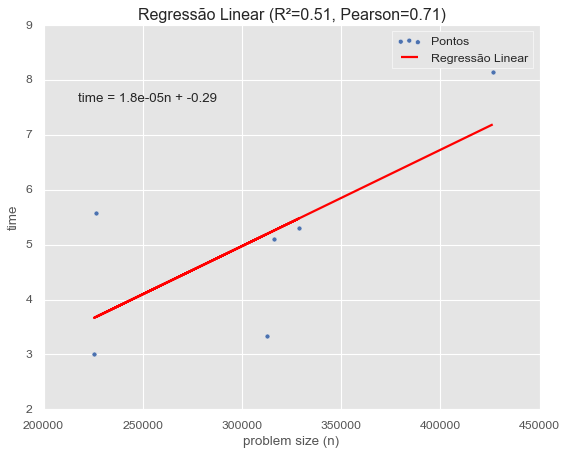

In [150]:
n = [image[0].n for image in lista_full]
t = [image[0].t for image in lista_full]
i = [image[0].iterations for image in lista_full]
show_linear_time(n,t)

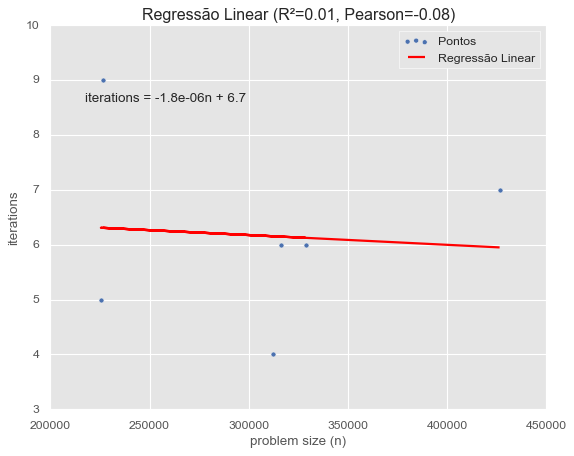

In [151]:
show_linear_iter(n,i)

# 3 CLUSTERS

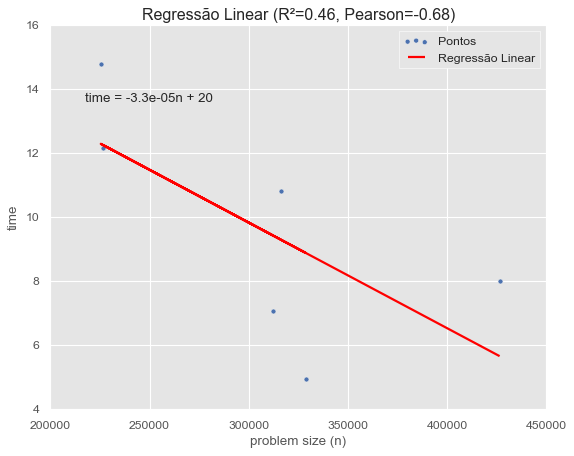

In [152]:
n = [image[1].n for image in lista_full]
t = [image[1].t for image in lista_full]
i = [image[1].iterations for image in lista_full]
show_linear_time(n,t)

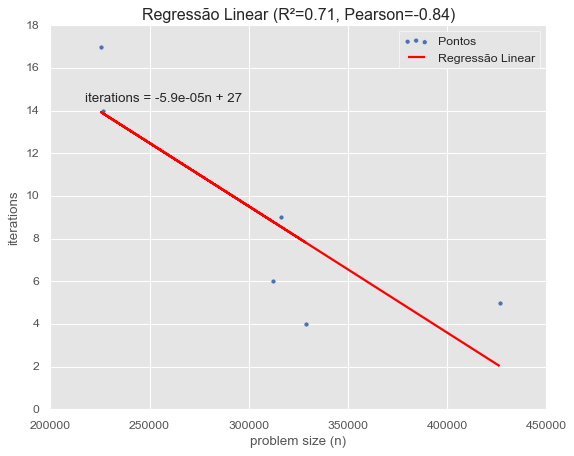

In [153]:
show_linear_iter(n,i)

# 4 CLUSTERS

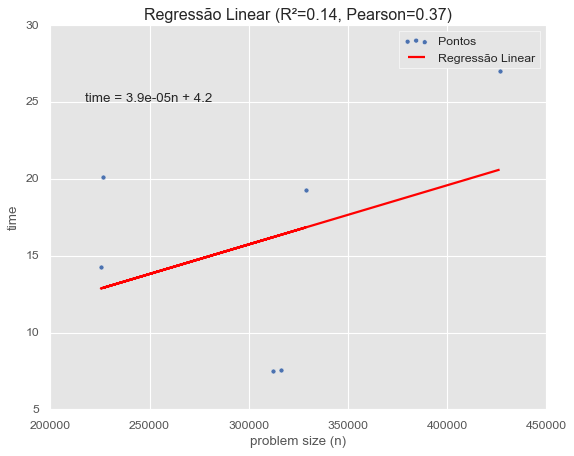

In [154]:
n = [image[2].n for image in lista_full]
t = [image[2].t for image in lista_full]
i = [image[2].iterations for image in lista_full]
show_linear_time(n,t)

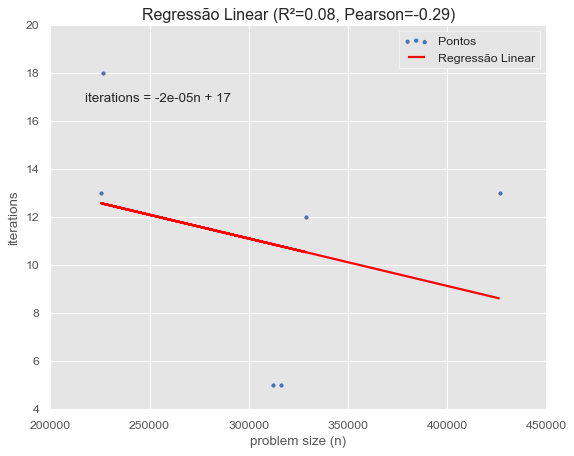

In [155]:
show_linear_iter(n,i)